<a href="https://colab.research.google.com/github/Psychose11/iris/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras

# import pandas as pd:

Cette ligne importe la bibliothèque pandas et lui donne l'alias pd. pandas est une bibliothèque puissante utilisée pour l'analyse et la manipulation de données en Python. Elle fournit des structures de données flexibles et expressives, telles que les DataFrames, qui facilitent le traitement des données tabulaires.

# import numpy as np:

Cette ligne importe la bibliothèque numpy et lui donne l'alias np. numpy est une bibliothèque fondamentale pour le calcul scientifique en Python. Elle fournit un support pour des tableaux multidimensionnels de grande taille et une collection de fonctions mathématiques pour les manipuler de manière efficace.

# import seaborn as sns:

Cette ligne importe la bibliothèque seaborn et lui donne l'alias sns. seaborn est une bibliothèque de visualisation de données basée sur matplotlib. Elle offre des interfaces de haut niveau pour créer des visualisations statistiques attrayantes et informatives, facilitant ainsi l'exploration et la compréhension des données.

# from tensorflow import keras:

Cette ligne importe le module keras de la bibliothèque tensorflow. Keras est une API de haut niveau pour construire et entraîner des modèles d'apprentissage automatique. Elle permet de créer des réseaux de neurones de manière simple et intuitive. TensorFlow est une bibliothèque open-source de calcul numérique et d'apprentissage automatique, largement utilisée pour la recherche et la production de modèles de machine learning.
Ces importations mettent en place les outils nécessaires pour travailler avec des données, effectuer des calculs numériques, créer des visualisations, et construire des modèles de machine learning.

In [16]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# df = pd.read_csv('IRIS.csv') :

Cette ligne lit un fichier CSV nommé 'IRIS.csv' en utilisant la fonction read_csv de pandas et stocke le contenu dans un DataFrame nommé df. Le fichier CSV doit être situé dans le répertoire courant ou vous pouvez fournir un chemin absolu ou relatif vers le fichier.

# df.head() :

Cette ligne affiche les cinq premières lignes du DataFrame df. La méthode head() de pandas est très utile pour obtenir un aperçu rapide des premières lignes du DataFrame et vérifier que les données ont été correctement chargées.

In [18]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
species_name = le.classes_
print(species_name)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [147]:
x = df.drop(columns = ['species'])
y = df['species']
x.head(3)

,sepal_length,sepal_width,petal_length,petal_width,Predicted,Actual
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa


In [34]:
print(y[:5])

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64


In [128]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=69)

In [129]:
x_train.shape


(105, 4)

In [130]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(x_train[:1])
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train[:1])

    sepal_length  sepal_width  petal_length  petal_width
57           4.9          2.4           3.3          1.0
[[-1.14630942 -1.44374444 -0.25650655 -0.258263  ]]


In [131]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [132]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [133]:
model = Sequential()
model.add(Dense(units=32, activation='relu',input_shape=(x_train.shape[-1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

In [134]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                160       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [135]:
model.fit(x_train, y_train, epochs=1000, verbose=2)

Epoch 1/1000
4/4 - 1s - loss: 1.1955 - accuracy: 0.3524 - 960ms/epoch - 240ms/step
Epoch 2/1000
4/4 - 0s - loss: 1.0790 - accuracy: 0.3619 - 19ms/epoch - 5ms/step
Epoch 3/1000
4/4 - 0s - loss: 1.0538 - accuracy: 0.4000 - 21ms/epoch - 5ms/step
Epoch 4/1000
4/4 - 0s - loss: 0.9675 - accuracy: 0.4667 - 16ms/epoch - 4ms/step
Epoch 5/1000
4/4 - 0s - loss: 0.9811 - accuracy: 0.4000 - 18ms/epoch - 4ms/step
Epoch 6/1000
4/4 - 0s - loss: 0.8890 - accuracy: 0.5619 - 16ms/epoch - 4ms/step
Epoch 7/1000
4/4 - 0s - loss: 0.8719 - accuracy: 0.5429 - 21ms/epoch - 5ms/step
Epoch 8/1000
4/4 - 0s - loss: 0.8361 - accuracy: 0.6381 - 24ms/epoch - 6ms/step
Epoch 9/1000
4/4 - 0s - loss: 0.7936 - accuracy: 0.6190 - 15ms/epoch - 4ms/step
Epoch 10/1000
4/4 - 0s - loss: 0.7895 - accuracy: 0.6571 - 18ms/epoch - 5ms/step
Epoch 11/1000
4/4 - 0s - loss: 0.7360 - accuracy: 0.7238 - 17ms/epoch - 4ms/step
Epoch 12/1000
4/4 - 0s - loss: 0.7172 - accuracy: 0.7238 - 17ms/epoch - 4ms/step
Epoch 13/1000
4/4 - 0s - loss: 0.7

In [136]:
prediction = model.predict(x_test)
print(f"Taille des prédictions : {prediction.shape[0]}")

print(prediction[:5])

2/2 [==============================] - 0s 10ms/step
Taille des prédictions : 45
[[9.9999994e-01 1.7041617e-15 2.1066831e-27]
 [5.7878365e-06 9.9994987e-01 4.4274435e-05]
 [9.9999994e-01 4.0832927e-12 5.1762720e-22]
 [2.5085625e-11 3.1730687e-07 9.9999958e-01]
 [9.9999994e-01 1.7460363e-11 1.9820663e-21]]


In [137]:
prediction = np.argmax(prediction, axis=-1)
print(prediction)

[0 1 0 2 0 0 1 2 2 0 1 2 0 1 2 1 1 2 1 2 2 1 0 0 2 0 2 2 1 0 0 0 0 2 2 2 0
 1 1 2 0 2 1 0 1]


In [138]:
print(y_test[:5])

4      0
58     1
20     0
114    2
31     0
Name: species, dtype: int64


In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, prediction))

0.9777777777777777


In [75]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[16  0  0]
 [ 0 12  0]
 [ 0  1 16]]


Text(50.72222222222221, 0.5, 'actuel')

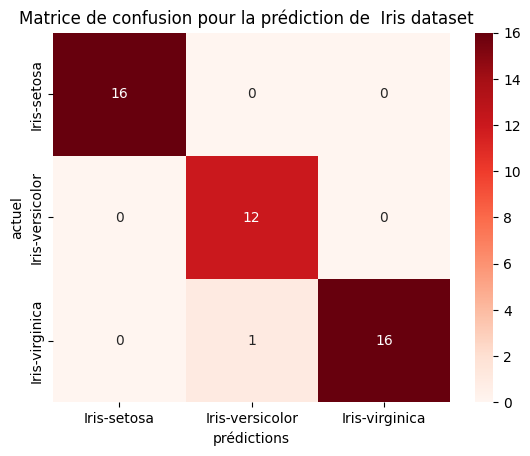

In [121]:
ax = sns.heatmap(cm,annot=True, fmt='d',cmap='Reds',xticklabels=species_name,yticklabels=species_name)
ax.set_title('Matrice de confusion pour la prédiction de  Iris dataset  ')
ax.set_xlabel('prédictions')
ax.set_ylabel('actuel')

In [154]:
species_mapping = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

predicted_species = [species_mapping[pred] for pred in prediction]
actual_species = [species_mapping[actual] for actual in y_test]

results_df = pd.DataFrame({
    'Predicted': predicted_species,
    'Actual': actual_species
})
print(results_df)

          Predicted           Actual
0       Iris-setosa      Iris-setosa
1   Iris-versicolor  Iris-versicolor
2       Iris-setosa      Iris-setosa
3    Iris-virginica   Iris-virginica
4       Iris-setosa      Iris-setosa
5       Iris-setosa      Iris-setosa
6   Iris-versicolor  Iris-versicolor
7    Iris-virginica   Iris-virginica
8    Iris-virginica   Iris-virginica
9       Iris-setosa      Iris-setosa
10  Iris-versicolor   Iris-virginica
11   Iris-virginica   Iris-virginica
12      Iris-setosa      Iris-setosa
13  Iris-versicolor  Iris-versicolor
14   Iris-virginica   Iris-virginica
15  Iris-versicolor  Iris-versicolor
16  Iris-versicolor  Iris-versicolor
17   Iris-virginica   Iris-virginica
18  Iris-versicolor  Iris-versicolor
19   Iris-virginica   Iris-virginica
20   Iris-virginica   Iris-virginica
21  Iris-versicolor  Iris-versicolor
22      Iris-setosa      Iris-setosa
23      Iris-setosa      Iris-setosa
24   Iris-virginica   Iris-virginica
25      Iris-setosa      Iris-setosa
2